<a href="https://colab.research.google.com/github/Eambr/little_lab/blob/main/LMCX4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LMC X-4 è un sistema binario che si trova nella Grande Nube di Magellano
LMC (Large Magellanic Cloud)
E' un sistema a grande massa (HMXB)
L'oggetto compatto è una stella di neutroni (NS)
che ha un periodo di spin osservato in banda X, quindi
si tratta di una **pulsar in accrescimento.**


**LMC X-4** è un sistema binario che si trova
bella Grande Nube di Magellano.
LMC : Large Magellanic Cloud

Le nubi di Magellano sono due Galassie satellite della nostra
galassia, e sono visibili ad occhio nudo nell'emisfero meridionale.
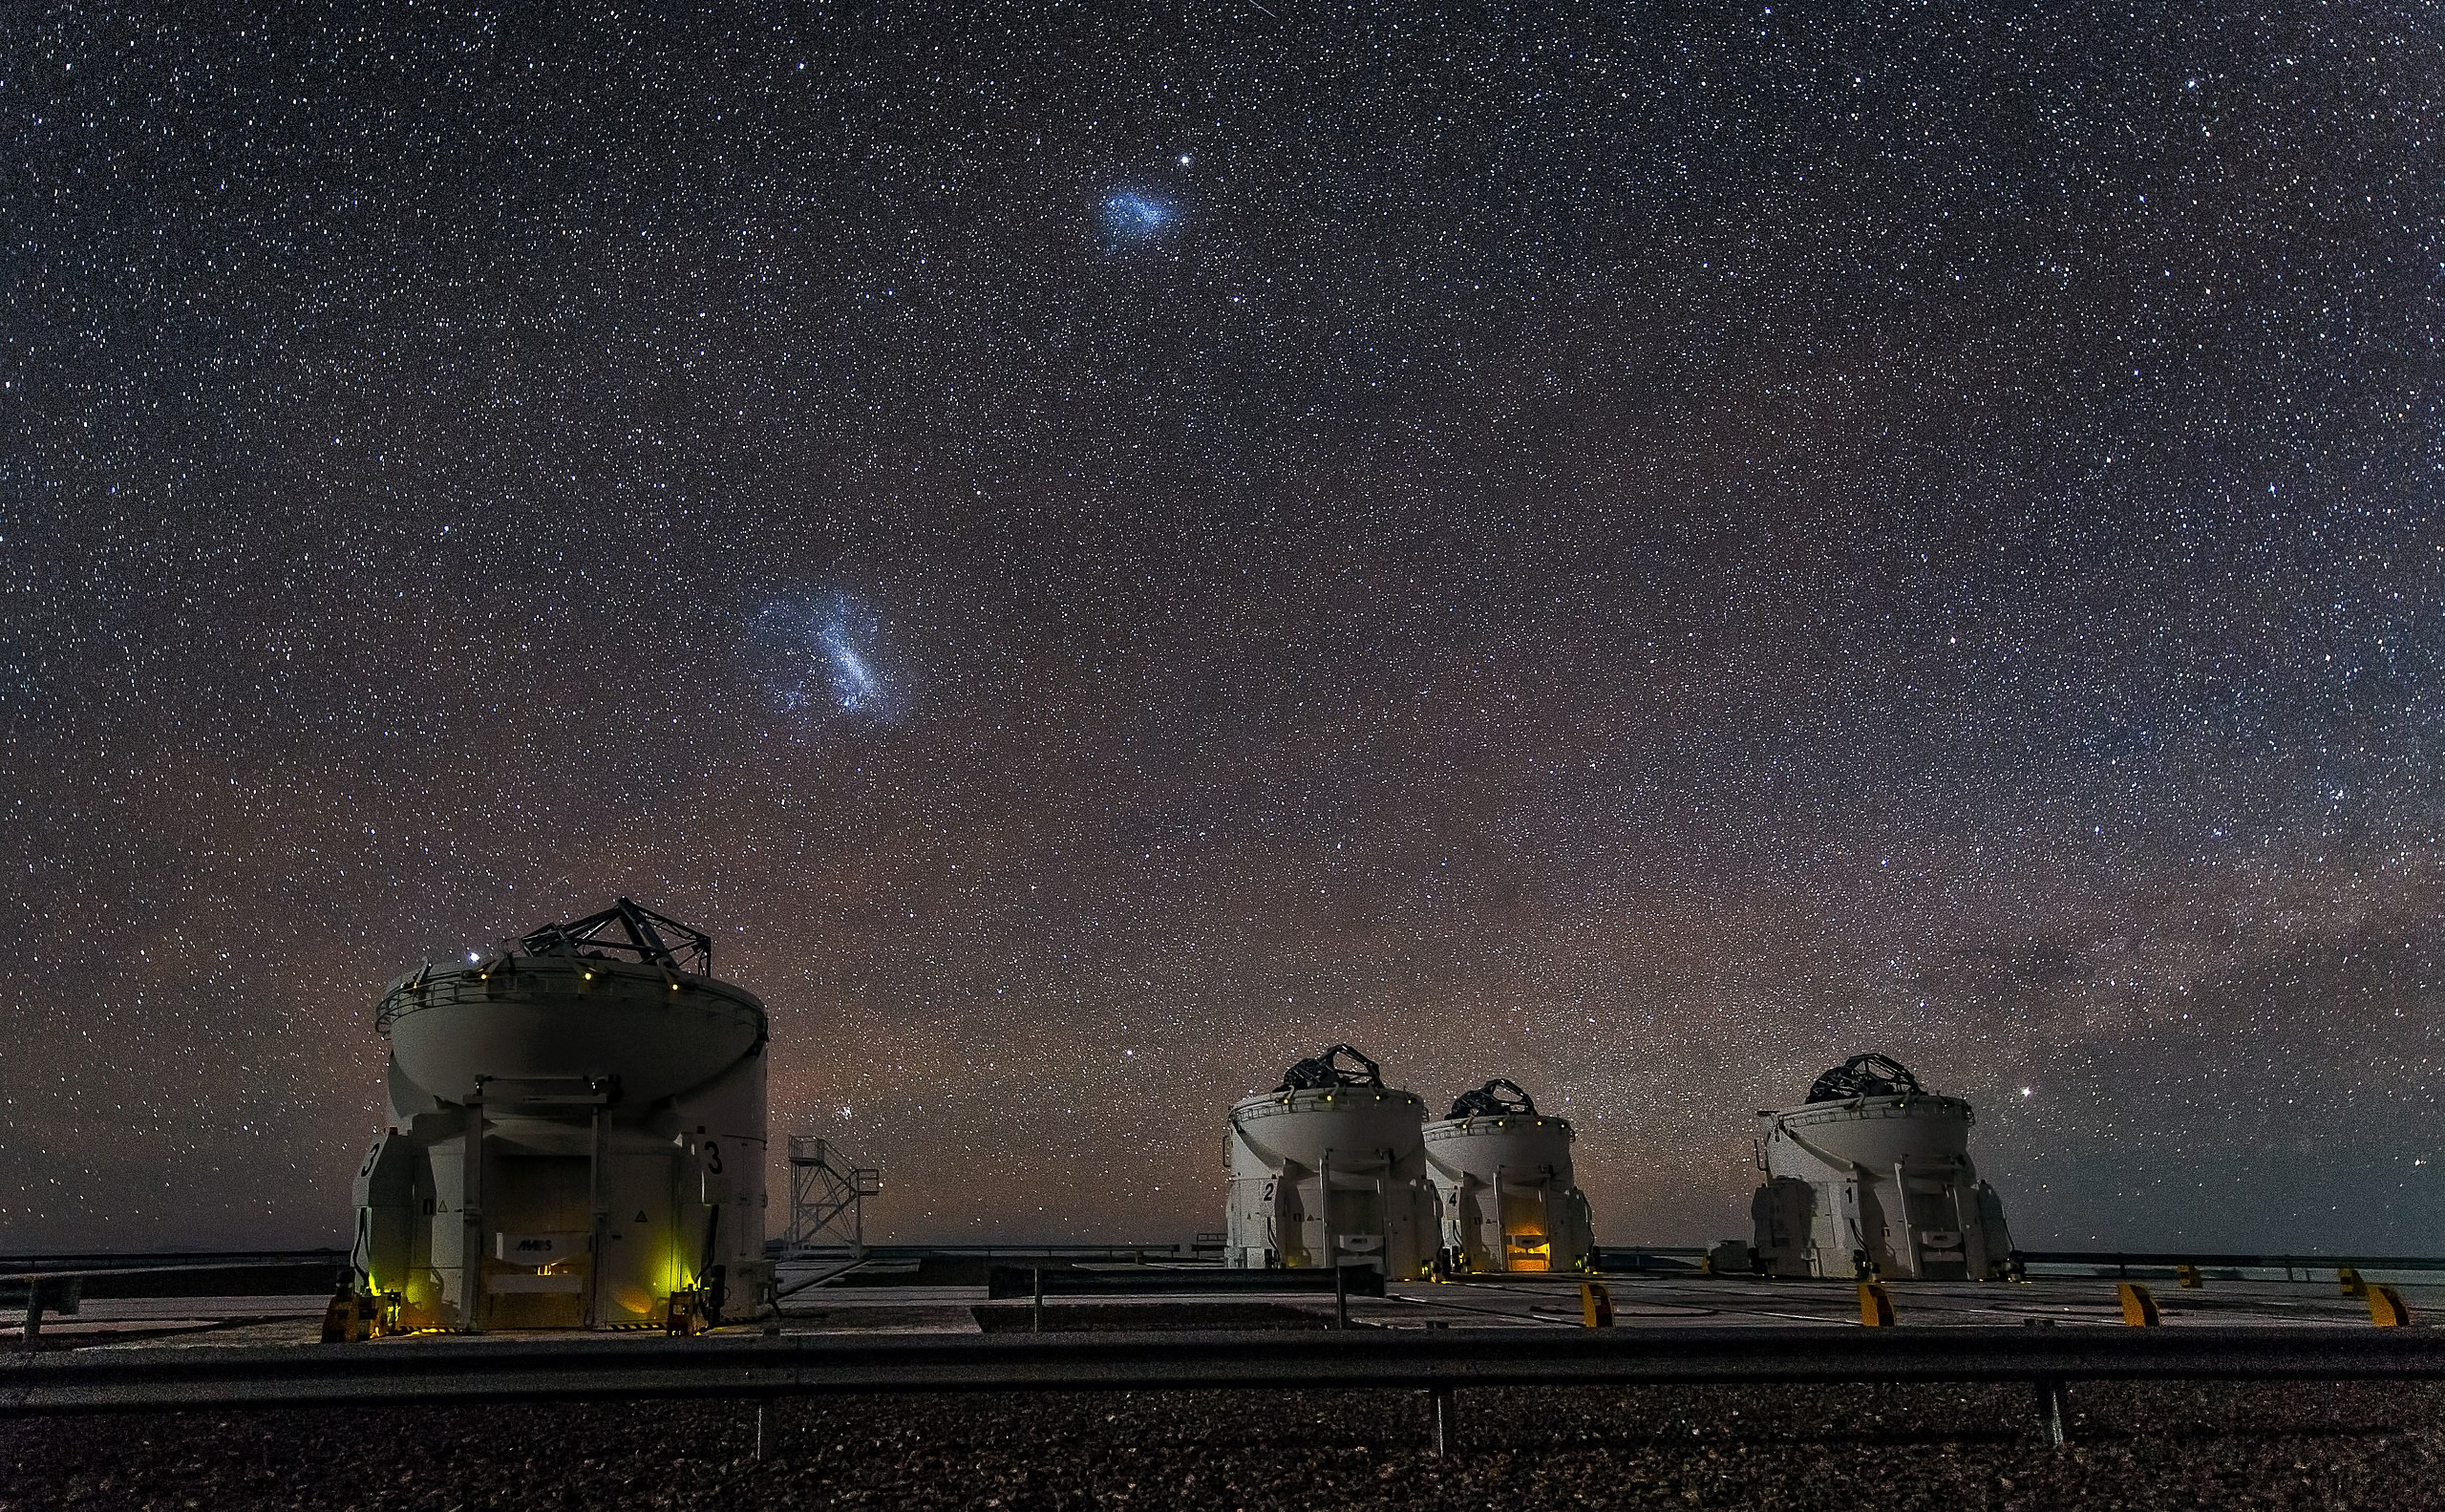

Ora restringiamo l'intervallo temporale per rendere la curva di luce meno compressa e capire come si comporta, com'è il suo andamento.

Sappiamo che questa sorgente ha una curva di luce periodica, ossia che si ripete ogni periodo.



Istruzioni:
L'elenco dei sistemi binari monitorati dallo strumento BAT si
trova in questa [pagina](https://swift.gsfc.nasa.gov/results/transients/)

1. Ora analizziamo i seguenti sistemi binari:

*   LMC X-4: https://swift.gsfc.nasa.gov/results/transients/LMCX-4.lc.txt
*   SMC X-1: https://swift.gsfc.nasa.gov/results/transients/SMCX-1.lc.txt
*   Swift J0243.6 + 6124: https://swift.gsfc.nasa.gov/results/transients/weak/SwiftJ0243.6p6124.lc.txt

2. plotta la curva di luce intera
3. plotta la curva di luce in un intervallo di date
   per capire se ci sono delle ripetizioni
4. riesci ad intuire una certa periodicità?
5. proviamo a ripiegare la curva di luce sul periodo trovato





In [1]:
#importiamo le librerie che ci servono per l'analisi
import pandas as pd
import matplotlib.pyplot as plt
from astropy.time import Time
%matplotlib inline

In [4]:

source_name ="LMC X-4"

url2 = "https://swift.gsfc.nasa.gov/results/transients/LMCX-4.lc.txt"

# Legge il file, ignorando tutte le righe di commento che iniziano con '#'
df = pd.read_csv(url2, delim_whitespace=True, skiprows =[0, 1, 2, 4], usecols= (0,1,2))




# Mostra le prime righe
print(df.head())
#cosa vediamo?




/tmp/ipython-input-3074264230.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url2, delim_whitespace=True, skiprows =[0, 1, 2, 4], usecols= (0,1,2))


       #      TIME      RATE
0  53416 -0.001237  0.003404
1  53418  0.003789  0.000589
2  53419  0.000415  0.000946
3  53420  0.002956  0.001898
4  53421  0.000370  0.000491


La prima colonna mi dice l'indice di ogni riga di questo dataset.
La seconda colonna ha una chiave imprecisa, ossia un asterisco.
Vogliamo cambiare questo errore di typing che si trova sull'intestazione del file.
Ci accorgiamo che le chiavi di ogni colonna sono spostate 'shiftate' di una
posizione.
Quindi sovrascriviamo le chiavi di ogni colonna per rendere più semplice
il plotting:

In [5]:

df.rename(columns={"#": "time", "TIME": "rate", "RATE": "error"}, inplace=True)
df.keys()
df = df.apply(pd.to_numeric, errors='coerce')

# Rimuove eventuali righe con valori NaN
df = df.dropna()
print(df.keys())

Index(['time', 'rate', 'error'], dtype='object')


Nella colonna 'TIME', il tempo è espresso in MJD (modified Julian Date).

Il Julian Date (JD) è un sistema continuo di conteggio del tempo utilizzato in astronomia, che indica il numero di giorni (e frazioni di giorno) trascorsi dal mezzogiorno del 1° gennaio 4713 a.C. nel calendario giuliano.

Per semplificare i calcoli e lavorare con numeri più piccoli, si usa spesso il Modified Julian Date (MJD), definito come MJD = JD − 2400000.5, che sposta l’origine temporale e fissa l’inizio del giorno alle 00:00 UT invece che a mezzogiorno. La conversione da MJD a una data del calendario gregoriano si ottiene aggiungendo 2400000.5 (per tornare al JD) e poi convertendo il JD in anno, mese e giorno; ad esempio, MJD = 60000 corrisponde al 28 maggio 2023, ore 00:00 UT.

In [11]:

#il pacchetto Time di astropy fa questo per noi

t = Time(df["time"], format="mjd")
t.isot

array(['2005-02-15T00:00:00.000', '2005-02-17T00:00:00.000',
       '2005-02-18T00:00:00.000', ..., '2025-11-04T00:00:00.000',
       '2025-11-05T00:00:00.000', '2025-11-06T00:00:00.000'], dtype='<U23')

# Ora plottiamo la curva di luce

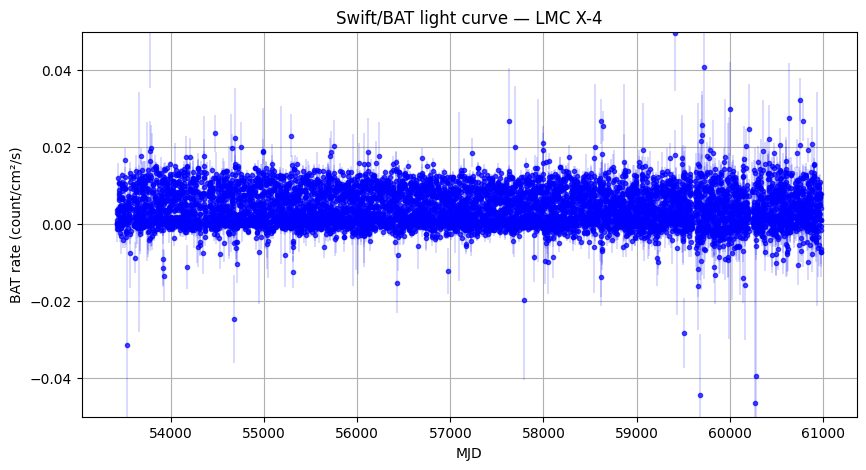

In [8]:

plt.figure(figsize=(10,5))
plt.errorbar(df['time'], df['rate'], yerr=df['error'], fmt=".", alpha=0.7, color="blue", linewidth = 0.3)
plt.xlabel("MJD")
plt.ylabel("BAT rate (count/cm²/s)")
plt.title(f"Swift/BAT light curve — {source_name}")
plt.xlim( )
plt.ylim(-0.05,0.05)
plt.grid(True)
plt.show()

Riesci a capire, da questo grafico, il periodo di questa curva?
**Prova a restringere il limite sull'asse X**

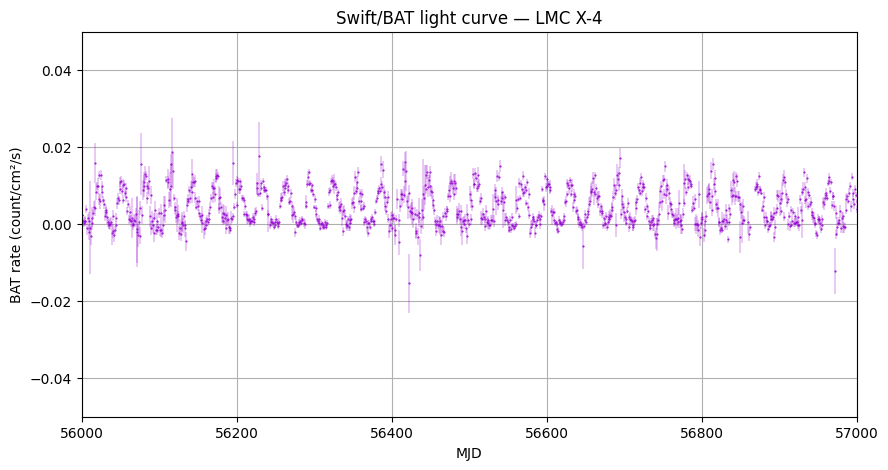

In [16]:
plt.figure(figsize=(10,5))
plt.errorbar(df['time'], df['rate'], yerr=df['error'], fmt=".", color="darkviolet", linewidth = 0.3, markersize = 1)
plt.xlabel("MJD")
plt.ylabel("BAT rate (count/cm²/s)")
plt.title(f"Swift/BAT light curve — {source_name}")
plt.xlim(56000, 57000 ) #inserisci un range di valori temporali per fare uno zomm della curva di luce
plt.ylim(-0.05,0.05)
plt.grid(True)
plt.show()

In [41]:
import numpy as np
from astropy.timeseries import LombScargle


# Assumo df con colonne: 'time' [giorni], 'rate', 'error'
time = df['time'].to_numpy()
rate = df['rate'].to_numpy()
rate_err = df['error'].to_numpy()

# --- Clean ---
m = np.isfinite(time) & np.isfinite(rate) & np.isfinite(rate_err)
time, rate, rate_err = time[m], rate[m], rate_err[m]

# evita duplicati esatti sui tempi (facoltativo)
uniq, idx = np.unique(time, return_index=True)
time, rate, rate_err = time[idx], rate[idx], rate_err[idx]

# errori > 0 con floor minimo
if np.any(rate_err <= 0) or not np.all(np.isfinite(rate_err)):
    med = np.median(rate_err[rate_err > 0]) if np.any(rate_err > 0) else 1.0
    floor = max(1e-12, 1e-3 * med)
    rate_err = np.where((~np.isfinite(rate_err)) | (rate_err <= 0), floor, rate_err)

# --- Frequenze: 5–100 giorni (puoi mettere 1/40..1/30 per zoom su ~35d)
min_period, max_period = 20, 40
frequency = np.linspace(1/max_period, 1/min_period, 20000)

# --- Lomb–Scargle coerente con FAP ---
ls = LombScargle(
    time, rate, dy=rate_err,
    fit_mean=True,         # lascia stimare l'offset
    center_data=True,      # centra internamente
    normalization='standard'  # necessario per FAP "classica"
)

power = ls.power(frequency, method='fast')
zmax = power.max()
best_freq = frequency[np.argmax(power)]
best_period = 1.0 / best_freq

rng = np.random.default_rng(42)
n_boot = 10
z_boot = np.empty(n_boot)

# FAP più stabile
fap = ls.false_alarm_probability(power.max(), method='baluev')
fap_baluev = float(np.clip(fap, 1e-300, 1.0))
for i in range(n_boot):
    # campiona i valori del flusso (mantieni i tempi)
    y_shuf = rng.permutation(rate)
    ls_boot = LombScargle(time, y_shuf, dy=rate_err,
                          fit_mean=True, center_data=True,
                          normalization='standard')
    p_boot = ls_boot.power(frequency, method='fast')
    z_boot[i] = p_boot.max()

# FAP = frazione di potenze surrogate >= zmax
fap_boot = (z_boot >= zmax).mean()
fap_boot = float(np.clip(fap_boot, 1e-300, 1.0))

print(f"FAP (bootstrap ): {fap_boot:.3e}")
print(f"FAP (Baluev, clipped): {fap_baluev:.3e}")
print(f"FAP (bootstrap):       {fap_boot:.3e}")


print(f"➡️  Miglior periodo: {best_period:.2f} giorni")


FAP (bootstrap ): 1.000e-300
FAP (Baluev, clipped): 1.000e-300
FAP (bootstrap):       1.000e-300
➡️  Miglior periodo: 30.45 giorni


In [43]:
from scipy.special import erfcinv
def fap_to_sigma(p):
    p = np.clip(p, 1e-300, 1-1e-15)
    return np.sqrt(2) * erfcinv(2*p)
print(f"Significanza bootstrap ≈ {fap_to_sigma(fap_boot):.2f} σ")

Significanza bootstrap ≈ 37.05 σ


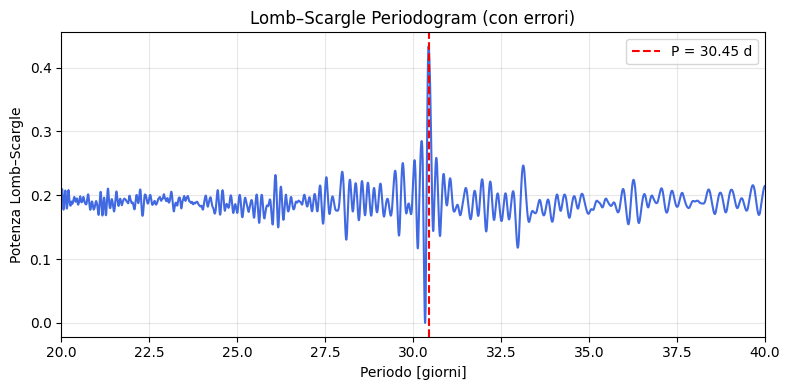

In [35]:
plt.figure(figsize=(8,4))
plt.plot(1/frequency, power, color="royalblue")
plt.axvline(best_period, color="red", ls="--", label=f"P = {best_period:.2f} d")
plt.xlabel("Periodo [giorni]")
plt.ylabel("Potenza Lomb–Scargle")
plt.title("Lomb–Scargle Periodogram ")
plt.xlim(min_period, max_period)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

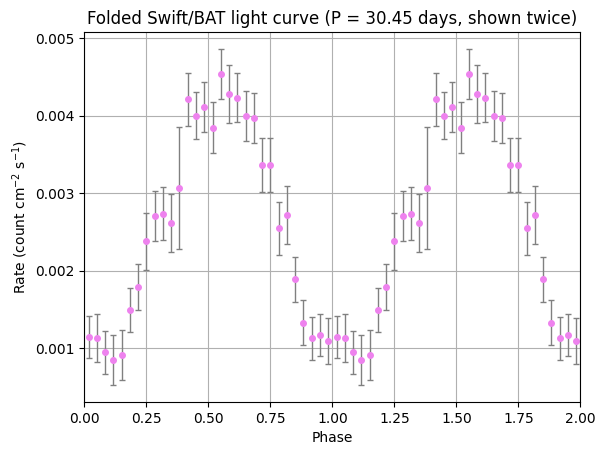

In [44]:

# === PARAMETERS ===
P = 30.45       # Period in days
t0 = time.min()  # Reference epoch (you can change it)

# === Compute phase ===
df["phase"] = (((time - t0)) / P )% 1.0

# === Bin the data in phase ===
nbins = 30
bins = np.linspace(0, 1, nbins + 1)
bin_means, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="mean", bins=bins)
bin_stds, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="std", bins=bins)
bin_counts, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="count", bins=bins)
bin_err = bin_stds / np.sqrt(bin_counts)   # Standard error of mean

# === Compute bin centers ===
phase_centers = 0.5 * (bins[1:] + bins[:-1])
phase_double = np.concatenate([phase_centers, phase_centers + 1.0])
rate_double = np.concatenate([bin_means, bin_means])
err_double = np.concatenate([bin_err, bin_err])

plt.errorbar(phase_double, rate_double, yerr=err_double, fmt='o', color='violet',
             ecolor='gray', elinewidth=1, capsize=2, markersize=4)
plt.xlabel("Phase")
plt.ylabel("Rate (count cm$^{-2}$ s$^{-1}$)")
plt.title(f"Folded Swift/BAT light curve (P = {P:.2f} days, shown twice)")
plt.grid(True)
plt.xlim(0, 2)
plt.show()

In [ ]:

source_name ="SMC X-1"

url2 = "https://swift.gsfc.nasa.gov/results/transients/SMCX-1.lc.txt"

# Legge il file, ignorando tutte le righe di commento che iniziano con '#'
df = pd.read_csv(url2, delim_whitespace=True, skiprows =[0, 1, 2, 4], usecols= (0,1,2))



# Mostra le prime righe
print(df.head())

df.rename(columns={"#": "time", "TIME": "rate", "RATE": "error"}, inplace=True)
df.keys()
df = df.apply(pd.to_numeric, errors='coerce')

# Rimuove eventuali righe con valori NaN
df = df.dropna()

plt.figure(figsize=(10,5))
plt.errorbar(df['time'], df['rate'], yerr=df['error'], fmt=".", alpha=0.7, color="coral")
plt.xlabel("MJD")
plt.ylabel("BAT rate (count/cm²/s)")
plt.title(f"Swift/BAT light curve — {source_name}")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.errorbar(df['time'], df['rate'], yerr=df['error'], fmt=".", alpha=0.7, color="coral")
plt.xlabel("MJD")
plt.ylabel("BAT rate (count/cm²/s)")
plt.title(f"Swift/BAT light curve — {source_name}")
plt.xlim(55000,56000)
plt.ylim(-0.05,0.05)
plt.grid(True)
plt.show()

Riesci a visualizzare una periodicità?

In [ ]:

# === PARAMETERS ===
P = 55       # Period in days
t0 = df["time"].min()  # Reference epoch (you can change it)

# === Compute phase ===
df["phase"] = ((df["time"] - t0) / P) % 1.0

# === Bin the data in phase ===
nbins = 30
bins = np.linspace(0, 1, nbins + 1)
bin_means, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="mean", bins=bins)
bin_stds, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="std", bins=bins)
bin_counts, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="count", bins=bins)
bin_err = bin_stds / np.sqrt(bin_counts)   # Standard error of mean

# === Compute bin centers ===
phase_centers = 0.5 * (bins[1:] + bins[:-1])
phase_double = np.concatenate([phase_centers, phase_centers + 1.0])
rate_double = np.concatenate([bin_means, bin_means])
err_double = np.concatenate([bin_err, bin_err])

plt.errorbar(phase_double, rate_double, yerr=err_double, fmt='o', color='orange',
             ecolor='gray', elinewidth=1, capsize=2, markersize=4)
plt.xlabel("Phase")
plt.ylabel("Rate (count cm$^{-2}$ s$^{-1}$)")
plt.title(f"Folded Swift/BAT light curve (P = {P:.2f} days, shown twice)")
plt.grid(True)
plt.xlim(0, 2)
plt.show()

**Swift J0243.6 + 6124**

In [ ]:
source_name = "Swift J0243.6 + 6124 "
url2 = "https://swift.gsfc.nasa.gov/results/transients/weak/SwiftJ0243.6p6124.lc.txt"

# Legge il file, ignorando tutte le righe di commento che iniziano con '#'
df = pd.read_csv(url2, delim_whitespace=True, skiprows =[0, 1, 2, 4], usecols= (0,1,2))




print(df.head())

df.rename(columns={"#": "time", "TIME": "rate", "RATE": "error"}, inplace=True)
df.keys()
df = df.apply(pd.to_numeric, errors='coerce')

# Rimuove eventuali righe con valori NaN
df = df.dropna()

plt.figure(figsize=(10,5))
plt.errorbar(df['time'], df['rate'], yerr=df['error'], fmt=".", alpha=0.7, color="purple")
plt.xlabel("MJD")
plt.ylabel("BAT rate (count/cm²/s)")
plt.title(f"Swift/BAT light curve — {source_name}")
plt.grid(True)
plt.show()